In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
# from skimage import data
# from skimage.feature import blob_dog, blob_log, blob_doh
# from math import sqrt
# from skimage.color import rgb2gray
# import glob
# from skimage.io import imread
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Keras
from keras.models import Model, Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras import layers
from functools import partial

Using TensorFlow backend.


In [2]:
from PIL import Image

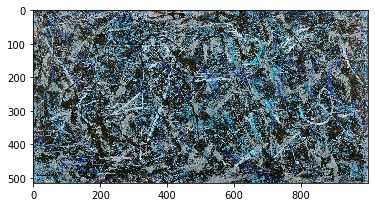

In [3]:
DATADIR = "D:/DU_Bootcamp/artwork_styles/styles"
CATEGORIES = ["abstract_expressionism", "abstractionism", "art_nouveau", "baroque",
             "byzantine_art", "cubism", "early_renaissance", "expressionism", "high_renaissance",
             "impressionism", "mannerism", "muralism", "neoplasticism", "northern_renaissance",
             "pop_art", "post_impressionism", "primitivism", "proto_renaissance",
             "realism", "romanticism", "social_realism", "suprematism", "surrealism",
             "symbolism"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to art categories
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array)

[[[ 90 112 153]
  [ 61  87 124]
  [ 65  99 129]
  ...
  [176 190 208]
  [134 164 181]
  [ 75 113 131]]

 [[ 70  96 136]
  [ 76 106 141]
  [ 49  85 115]
  ...
  [167 182 198]
  [160 188 205]
  [ 74 110 128]]

 [[ 67 105 140]
  [ 45  83 117]
  [ 61 101 130]
  ...
  [153 166 182]
  [167 193 210]
  [102 136 152]]

 ...

 [[ 68 112 141]
  [ 57 100 127]
  [ 48  89 112]
  ...
  [125 144 157]
  [167 186 199]
  [ 83 102 115]]

 [[ 73 119 150]
  [ 58 102 131]
  [ 54  95 120]
  ...
  [128 147 162]
  [137 153 169]
  [169 185 201]]

 [[121 167 198]
  [ 64 108 137]
  [ 40  81 106]
  ...
  [154 173 188]
  [122 138 154]
  [100 116 132]]]


In [5]:
img_size = 120

In [6]:
training_data = []



def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to art categories
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR) #
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

In [7]:
print(len(training_data))

10182


In [8]:
# data_subset = training_data[0:2000]

In [9]:
import random

In [10]:


random.shuffle(training_data)


In [11]:
data_subset = training_data[0:2000]

In [12]:
for sample in training_data:
    print(sample[1])

15
9
8
10
3
9
5
15
15
1
8
15
9
7
19
13
13
10
9
23
23
3
9
22
10
14
22
9
13
9
9
23
19
9
15
22
9
7
10
7
13
7
19
15
22
19
13
5
10
3
15
9
13
23
9
23
23
23
3
7
22
13
3
1
22
13
9
22
13
5
9
23
14
23
9
15
13
7
15
23
15
15
9
9
6
19
15
13
8
15
22
3
15
16
9
22
12
15
9
9
9
3
15
15
7
16
23
15
7
8
15
9
15
15
7
9
15
13
23
15
9
8
9
13
8
13
9
9
23
19
22
15
15
22
10
9
23
15
16
9
1
9
13
15
16
8
9
9
16
15
13
15
15
15
5
3
3
21
5
9
3
2
13
15
19
15
10
3
23
19
15
14
9
23
9
9
19
15
22
16
5
15
1
23
9
15
13
7
8
15
15
13
9
22
16
14
22
23
9
15
7
3
22
20
4
17
9
9
13
7
9
12
9
23
9
15
9
5
9
3
15
16
3
10
9
23
9
15
22
22
21
8
19
3
9
9
6
13
22
10
13
13
21
22
1
9
22
2
16
15
15
9
15
16
19
1
13
15
13
7
8
9
9
1
9
20
15
13
9
19
3
9
22
7
7
15
3
9
23
7
22
9
16
22
22
13
10
12
9
12
8
8
3
23
15
3
9
9
22
5
4
7
9
9
14
15
13
10
9
9
9
14
22
13
9
15
22
1
6
13
15
9
1
17
23
9
22
7
8
15
15
2
16
9
17
3
1
15
8
7
9
19
21
3
2
15
15
1
13
8
9
22
22
8
5
21
5
7
23
10
7
15
20
15
8
10
8
16
9
15
12
13
8
17
9
10
19
8
15
2
8
7
3
9
10
5
9
23
9
8
1
15
3

2
9
21
15
5
17
9
22
14
13
19
11
22
9
16
13
15
10
1
23
7
13
9
9
9
22
16
9
19
9
18
15
10
16
15
9
9
9
9
5
17
9
18
15
9
9
13
3
17
9
22
23
9
22
18
23
2
1
8
3
23
7
19
15
22
7
7
3
0
19
15
15
8
9
8
7
16
19
15
23
15
23
5
15
7
9
17
9
15
15
17
15
5
15
15
22
22
10
19
16
13
9
8
15
6
15
9
22
9
17
23
3
20
7
6
9
15
23
7
7
15
20
16
21
1
3
8
15
9
23
6
1
15
9
6
15
15
9
9
16
3
9
3
19
9
7
9
9
16
23
13
23
10
14
3
1
13
9
22
9
9
2
19
13
15
23
23
19
14
9
19
15
17
9
9
15
15
15
8
15
8
22
13
10
2
23
10
5
21
15
5
21
9
5
3
22
8
9
22
9
13
15
15
10
23
13
21
13
9
1
8
15
8
15
7
8
22
16
19
8
13
6
9
3
9
9
23
22
8
16
18
5
3
9
19
18
18
15
9
16
3
9
22
22
23
1
5
5
8
13
16
15
3
14
16
13
19
15
7
3
15
23
9
15
9
9
9
15
8
23
6
5
9
19
10
9
9
22
16
15
8
7
10
7
16
8
3
15
16
23
23
13
15
15
5
5
8
5
23
18
22
9
15
15
9
4
5
5
9
11
22
22
13
6
3
13
9
9
2
19
7
19
15
7
23
3
2
23
9
9
13
9
7
23
22
6
8
23
15
23
15
15
9
8
9
15
9
9
8
23
23
6
22
9
9
13
3
15
12
16
15
7
19
10
20
15
5
15
9
6
15
18
15
9
18
6
17
15
1
9
9
15
13
23
15
9
13
22
12
8
13
22


23
1
3
5
9
0
9
13
9
19
15
7
9
23
18
9
10
9
15
19
15
23
15
13
6
9
23
22
15
15
3
9
12
7
3
9
21
22
15
7
16
9
23
20
2
9
13
9
22
9
23
10
5
15
22
22
1
10
9
9
9
17
15
8
9
9
11
20
17
3
20
5
8
20
16
15
15
9
9
18
5
3
3
15
9
14
15
17
15
18
22
9
23
10
5
9
19
7
9
9
12
9
17
20
18
7
15
14
3
12
9
5
9
14
4
15
12
3
1
15
8
10
14
22
13
15
5
13
15
8
10
9
5
13
23
16
13
9
15
23
3
16
10
23
22
7
10
6
15
9
22
15
9
13
7
22
13
14
17
15
9
3
15
13
13
8
23
15
23
5
13
9
1
2
17
18
15
10
9
14
15
22
13
16
9
14
23
3
15
2
3
8
15
16
23
11
9
9
15
22
9
8
16
16
9
23
4
15
9
16
13
9
23
9
23
7
9
19
10
8
15
9
5
3
7
18
15
12
9
8
15
3
21
14
15
15
16
22
3
15
22
19
1
1
14
6
3
15
10
7
16
3
10
9
6
22
1
15
4
7
15
9
3
9
9
9
13
8
8
8
19
22
15
9
15
13
9
12
13
7
9
10
15
16
8
7
3
7
14
15
19
9
22
9
22
15
18
9
5
6
15
18
16
22
2
13
16
9
22
17
7
1
15
15
7
23
9
9
9
5
9
3
13
4
9
5
2
5
10
15
16
23
5
15
9
9
22
15
9
23
3
4
23
15
9
9
17
3
15
8
13
22
8
9
13
23
23
9
22
8
22
9
9
13
8
13
10
10
22
6
19
23
3
7
13
9
4
4
15
3
7
1
6
5
15
22
3
7
15
9
10
9
9
9
3

In [13]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
# for features, label in data_subset:
#     X.append(features)
#     y.append(label)


In [14]:
print(np.unique(y))

In [15]:
len(X)

In [16]:
len(y)

In [17]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [18]:
X.shape

(10182, 120, 120, 3)

In [19]:
(trainX, testX, trainY, testY) = train_test_split(X, y)

In [20]:
# import pickle

In [21]:
# pickle_out1 = open("trainX.pickle", "wb")
# pickle.dump(trainX, pickle_out1)
# pickle_out1.close

# pickle_out2 = open("testX.pickle", "wb")
# pickle.dump(testX, pickle_out2)
# pickle_out2.close

# pickle_out3 = open("trainY.pickle", "wb")
# pickle.dump(trainY, pickle_out3)
# pickle_out3.close

# pickle_out4 = open("testY.pickle", "wb")
# pickle.dump(testY, pickle_out4)
# pickle_out4.close

In [22]:
# pickle_inX = open("X.pickle", "rb")
# pickle_inY = open("y.pickle", "rb")
# X = pickle.load(pickle_inX)
# y = pickle.load(pickle_inY)

In [23]:
trainX[0,:,:]

array([[[254, 251, 253],
        [254, 251, 253],
        [254, 251, 253],
        ...,
        [252, 252, 252],
        [254, 252, 252],
        [254, 252, 252]],

       [[254, 251, 253],
        [254, 251, 253],
        [254, 251, 253],
        ...,
        [253, 248, 249],
        [254, 252, 252],
        [254, 252, 252]],

       [[249, 252, 250],
        [251, 254, 252],
        [241, 245, 240],
        ...,
        [167, 166, 156],
        [254, 253, 246],
        [255, 249, 249]],

       ...,

       [[251, 247, 242],
        [252, 248, 243],
        [255, 247, 238],
        ...,
        [ 14,  40,  15],
        [118, 153, 131],
        [255, 249, 249]],

       [[253, 249, 244],
        [251, 247, 242],
        [243, 243, 232],
        ...,
        [148, 169, 155],
        [188, 201, 194],
        [255, 249, 252]],

       [[253, 249, 244],
        [254, 250, 245],
        [245, 250, 241],
        ...,
        [251, 253, 251],
        [254, 252, 252],
        [249, 255, 246]]

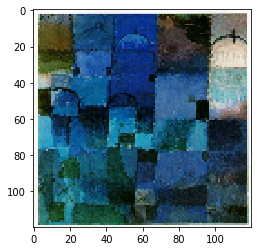

In [24]:
plt.imshow(trainX[0,:,:], cmap=plt.cm.jet)

In [25]:
trainX.shape

(7636, 120, 120, 3)

In [26]:
# testX.shape

In [27]:
trainX[0].shape

(120, 120, 3)

In [28]:
# trainX = trainX.reshape(7636, -1)#.shape


In [29]:
trainX.shape

(7636, 120, 120, 3)

In [30]:
testX.shape

(2546, 120, 120, 3)

In [31]:
# # flatten 64x64 pixels to a 1D array
# ndims = trainX.shape[1] * trainX.shape[2]
# trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2], 1)
# testX = testX.reshape(testX.shape[0], ndims)
# print(trainX)
#print(testX)

In [32]:
# testX = testX.reshape(2546, -1)#.shape

In [33]:
# trainX[0].ptp

In [34]:
testX.shape

(2546, 120, 120, 3)

In [35]:
# normalize to be between 0 and 1
# scaler = MinMaxScaler().fit(trainX)

# X_train = scaler.transform(trainX)
# X_test = scaler.transform(testX)

In [36]:
# MinMaxScaler()

In [37]:
# Make labels categorical
num_classes = 24
trainY = to_categorical(trainY, num_classes)
testY = to_categorical(testY, num_classes)

In [38]:
trainY

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
trainY

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
# Create model
model = Sequential()

# Add model layers
model.add(Conv2D(32, kernel_size=3, strides=1, activation="relu", padding = "same", input_shape= (img_size,img_size,3)))
model.add(Conv2D(32, kernel_size=3, strides=1, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=2, strides=1, activation="relu", padding = "same"))
model.add(Conv2D(64, kernel_size=2, strides=1, activation="relu", padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(24, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
# VGG-like model
conv3 = partial(layers.Conv2D,
               kernel_size=3,
               strides=1,
               padding="same",
               activation="relu")
def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block
def _vgg(in_shape=(img_size,img_size, 3),
        n_classes=1000,
        opt="sgd",
        n_stages_per_blocks = [2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)

    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    preds = layers.Dense(24, activation='softmax')(dense2)

    model2 = Model(in_layer, preds)
    model2.compile(loss="categorical_crossentropy", optimizer=opt,
	              metrics=["accuracy"])
    return model2

def vgg16(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(img_size,img_size,3), n_classes=1000, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])

if __name__ == '__main__':
    model2 = vgg19()
    print(model2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 120, 120, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 128)       0         
__________

In [45]:
# Compile model using accuracy to measure model performance
model2.compile(optimizer="adam", loss="categorical_crossentropy",
             metrics=["accuracy"])

In [46]:
%%time
model2.fit(trainX, trainY, validation_data=(testX, testY), epochs=3)

Train on 7636 samples, validate on 2546 samples
Epoch 1/3


6208/7636 [=======================>......] - ETA: 53:12 - loss: 12.5923 - acc: 0.218 - ETA: 44:12 - loss: 13.0960 - acc: 0.187 - ETA: 41:11 - loss: 13.2638 - acc: 0.177 - ETA: 39:22 - loss: 13.0960 - acc: 0.187 - ETA: 38:23 - loss: 13.0960 - acc: 0.187 - ETA: 37:46 - loss: 13.3478 - acc: 0.171 - ETA: 37:14 - loss: 13.2399 - acc: 0.178 - ETA: 36:43 - loss: 12.9700 - acc: 0.195 - ETA: 36:19 - loss: 13.0400 - acc: 0.191 - ETA: 35:59 - loss: 13.0960 - acc: 0.187 - ETA: 35:35 - loss: 13.0960 - acc: 0.187 - ETA: 35:13 - loss: 13.1799 - acc: 0.182 - ETA: 34:53 - loss: 13.1347 - acc: 0.185 - ETA: 34:33 - loss: 13.1319 - acc: 0.185 - ETA: 34:13 - loss: 13.1295 - acc: 0.185 - ETA: 33:56 - loss: 13.1904 - acc: 0.181 - ETA: 33:53 - loss: 13.1848 - acc: 0.182 - ETA: 33:48 - loss: 13.1519 - acc: 0.184 - ETA: 33:45 - loss: 13.2285 - acc: 0.179 - ETA: 33:37 - loss: 13.2722 - acc: 0.176 - ETA: 33:28 - loss: 13.2878 - acc: 0.175 - ETA: 33:20 - loss: 13.3020 - acc: 0.174 - ETA: 33:09 - loss: 13.3587 - ac

7636/7636 [==============================] - ETA: 6:29 - loss: 13.1915 - acc: 0.18 - ETA: 6:20 - loss: 13.1962 - acc: 0.18 - ETA: 6:11 - loss: 13.2008 - acc: 0.18 - ETA: 6:02 - loss: 13.1977 - acc: 0.18 - ETA: 5:53 - loss: 13.1972 - acc: 0.18 - ETA: 5:44 - loss: 13.1866 - acc: 0.18 - ETA: 5:35 - loss: 13.1912 - acc: 0.18 - ETA: 5:26 - loss: 13.1932 - acc: 0.18 - ETA: 5:18 - loss: 13.1902 - acc: 0.18 - ETA: 5:09 - loss: 13.1898 - acc: 0.18 - ETA: 5:00 - loss: 13.1967 - acc: 0.18 - ETA: 4:51 - loss: 13.2060 - acc: 0.18 - ETA: 4:42 - loss: 13.2055 - acc: 0.18 - ETA: 4:33 - loss: 13.2025 - acc: 0.18 - ETA: 4:24 - loss: 13.2044 - acc: 0.18 - ETA: 4:15 - loss: 13.2015 - acc: 0.18 - ETA: 4:06 - loss: 13.2010 - acc: 0.18 - ETA: 3:57 - loss: 13.2029 - acc: 0.18 - ETA: 3:48 - loss: 13.2000 - acc: 0.18 - ETA: 3:39 - loss: 13.1925 - acc: 0.18 - ETA: 3:30 - loss: 13.1943 - acc: 0.18 - ETA: 3:21 - loss: 13.1869 - acc: 0.18 - ETA: 3:12 - loss: 13.1888 - acc: 0.18 - ETA: 3:03 - loss: 13.1884 - acc: 0.

6272/7636 [=======================>......] - ETA: 34:29 - loss: 13.0960 - acc: 0.187 - ETA: 33:49 - loss: 13.3478 - acc: 0.171 - ETA: 33:47 - loss: 13.0960 - acc: 0.187 - ETA: 33:34 - loss: 13.0960 - acc: 0.187 - ETA: 33:29 - loss: 13.2974 - acc: 0.175 - ETA: 33:22 - loss: 13.0960 - acc: 0.187 - ETA: 33:14 - loss: 12.9520 - acc: 0.196 - ETA: 33:13 - loss: 13.2848 - acc: 0.175 - ETA: 33:00 - loss: 13.3198 - acc: 0.173 - ETA: 33:00 - loss: 13.3478 - acc: 0.171 - ETA: 32:48 - loss: 13.2791 - acc: 0.176 - ETA: 32:38 - loss: 13.1799 - acc: 0.182 - ETA: 32:27 - loss: 13.0960 - acc: 0.187 - ETA: 32:37 - loss: 13.1319 - acc: 0.185 - ETA: 32:26 - loss: 13.1295 - acc: 0.185 - ETA: 32:20 - loss: 13.1274 - acc: 0.185 - ETA: 32:11 - loss: 13.0960 - acc: 0.187 - ETA: 32:00 - loss: 12.9840 - acc: 0.194 - ETA: 31:51 - loss: 13.0164 - acc: 0.192 - ETA: 31:40 - loss: 13.0960 - acc: 0.187 - ETA: 31:33 - loss: 13.0480 - acc: 0.190 - ETA: 31:24 - loss: 13.0273 - acc: 0.191 - ETA: 31:13 - loss: 12.9865 - ac

7636/7636 [==============================] - ETA: 6:23 - loss: 13.2085 - acc: 0.18 - ETA: 6:13 - loss: 13.2079 - acc: 0.18 - ETA: 6:04 - loss: 13.2023 - acc: 0.18 - ETA: 5:55 - loss: 13.2017 - acc: 0.18 - ETA: 5:46 - loss: 13.1937 - acc: 0.18 - ETA: 5:37 - loss: 13.1832 - acc: 0.18 - ETA: 5:28 - loss: 13.1878 - acc: 0.18 - ETA: 5:19 - loss: 13.1824 - acc: 0.18 - ETA: 5:10 - loss: 13.1844 - acc: 0.18 - ETA: 5:00 - loss: 13.1889 - acc: 0.18 - ETA: 4:51 - loss: 13.1957 - acc: 0.18 - ETA: 4:42 - loss: 13.2049 - acc: 0.18 - ETA: 4:33 - loss: 13.2092 - acc: 0.18 - ETA: 4:24 - loss: 13.2159 - acc: 0.18 - ETA: 4:15 - loss: 13.2177 - acc: 0.17 - ETA: 4:05 - loss: 13.2243 - acc: 0.17 - ETA: 3:56 - loss: 13.2236 - acc: 0.17 - ETA: 3:47 - loss: 13.2231 - acc: 0.17 - ETA: 3:38 - loss: 13.2225 - acc: 0.17 - ETA: 3:29 - loss: 13.2242 - acc: 0.17 - ETA: 3:20 - loss: 13.2167 - acc: 0.18 - ETA: 3:10 - loss: 13.2138 - acc: 0.18 - ETA: 3:01 - loss: 13.2156 - acc: 0.18 - ETA: 2:52 - loss: 13.2104 - acc: 0.

6240/7636 [=======================>......] - ETA: 41:45 - loss: 12.0886 - acc: 0.250 - ETA: 43:10 - loss: 11.8367 - acc: 0.265 - ETA: 42:46 - loss: 11.9207 - acc: 0.260 - ETA: 41:55 - loss: 11.5849 - acc: 0.281 - ETA: 41:30 - loss: 12.1893 - acc: 0.243 - ETA: 41:08 - loss: 12.5923 - acc: 0.218 - ETA: 40:38 - loss: 13.0960 - acc: 0.187 - ETA: 40:21 - loss: 13.2219 - acc: 0.179 - ETA: 39:57 - loss: 13.2079 - acc: 0.180 - ETA: 39:30 - loss: 13.0456 - acc: 0.190 - ETA: 39:15 - loss: 13.2333 - acc: 0.179 - ETA: 39:04 - loss: 13.0540 - acc: 0.190 - ETA: 38:52 - loss: 13.1347 - acc: 0.185 - ETA: 38:42 - loss: 13.0960 - acc: 0.187 - ETA: 38:25 - loss: 12.9616 - acc: 0.195 - ETA: 38:12 - loss: 13.0645 - acc: 0.189 - ETA: 37:57 - loss: 13.0071 - acc: 0.193 - ETA: 37:44 - loss: 12.9840 - acc: 0.194 - ETA: 37:27 - loss: 13.0429 - acc: 0.190 - ETA: 37:13 - loss: 13.0456 - acc: 0.190 - ETA: 36:58 - loss: 13.0480 - acc: 0.190 - ETA: 36:44 - loss: 13.0273 - acc: 0.191 - ETA: 36:32 - loss: 13.0522 - ac

7636/7636 [==============================] - ETA: 6:56 - loss: 13.2476 - acc: 0.17 - ETA: 6:46 - loss: 13.2468 - acc: 0.17 - ETA: 6:36 - loss: 13.2486 - acc: 0.17 - ETA: 6:26 - loss: 13.2504 - acc: 0.17 - ETA: 6:16 - loss: 13.2445 - acc: 0.17 - ETA: 6:07 - loss: 13.2463 - acc: 0.17 - ETA: 5:57 - loss: 13.2406 - acc: 0.17 - ETA: 5:47 - loss: 13.2473 - acc: 0.17 - ETA: 5:37 - loss: 13.2416 - acc: 0.17 - ETA: 5:27 - loss: 13.2360 - acc: 0.17 - ETA: 5:17 - loss: 13.2304 - acc: 0.17 - ETA: 5:07 - loss: 13.2176 - acc: 0.18 - ETA: 4:57 - loss: 13.2219 - acc: 0.17 - ETA: 4:47 - loss: 13.2140 - acc: 0.18 - ETA: 4:37 - loss: 13.2231 - acc: 0.17 - ETA: 4:28 - loss: 13.2153 - acc: 0.18 - ETA: 4:18 - loss: 13.2147 - acc: 0.18 - ETA: 4:08 - loss: 13.2118 - acc: 0.18 - ETA: 3:58 - loss: 13.2113 - acc: 0.18 - ETA: 3:48 - loss: 13.2178 - acc: 0.17 - ETA: 3:39 - loss: 13.2172 - acc: 0.18 - ETA: 3:29 - loss: 13.2097 - acc: 0.18 - ETA: 3:19 - loss: 13.2115 - acc: 0.18 - ETA: 3:09 - loss: 13.2110 - acc: 0.

In [47]:
model_loss, model_accuracy = model2.evaluate(testX, testY, verbose=2)
print(model_loss, model_accuracy)

13.17429567113788 0.1826394344127656


In [62]:
# Create Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [63]:
predicted = model2.predict(testX)
matrix = confusion_matrix(testY.argmax(axis=1), predicted.argmax(axis=1))
print(matrix)

[[  0   0   0   0   0   0   0   0   0   8   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  71   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 157   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  24   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 112   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 125   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 148   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 465   0   0   0   0   0   0   0   0
    0   0   0   0

In [65]:
model2.save("cnn_2.h5")

In [66]:
plot_model(model2, to_file="style_classifier.png")

### MOAR MODELS

In [49]:
img_rows, img_cols = img_size, img_size
input_shape = (img_rows, img_cols, 3)

In [50]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2,2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation="relu"))
cnn1.add(Dense(24, activation="softmax"))

cnn1.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [51]:
history1 = cnn1.fit(trainX, trainY, validation_data=(testX, testY),
         #batch_size=250,
        # verbose=1,
         epochs=10)

Train on 7636 samples, validate on 2546 samples
Epoch 1/10


6496/7636 [========================>.....] - ETA: 7:55 - loss: 14.2409 - acc: 0.09 - ETA: 4:36 - loss: 14.6758 - acc: 0.07 - ETA: 3:36 - loss: 14.9887 - acc: 0.06 - ETA: 3:04 - loss: 15.1451 - acc: 0.05 - ETA: 2:47 - loss: 15.0375 - acc: 0.06 - ETA: 2:39 - loss: 15.2176 - acc: 0.05 - ETA: 2:29 - loss: 15.2743 - acc: 0.04 - ETA: 2:19 - loss: 15.3798 - acc: 0.04 - ETA: 2:15 - loss: 15.4618 - acc: 0.03 - ETA: 2:11 - loss: 15.5274 - acc: 0.03 - ETA: 2:08 - loss: 15.4438 - acc: 0.03 - ETA: 2:07 - loss: 15.4999 - acc: 0.03 - ETA: 2:04 - loss: 15.5475 - acc: 0.03 - ETA: 2:02 - loss: 15.5523 - acc: 0.03 - ETA: 2:00 - loss: 15.5900 - acc: 0.03 - ETA: 1:56 - loss: 15.5915 - acc: 0.03 - ETA: 1:54 - loss: 15.5929 - acc: 0.03 - ETA: 1:53 - loss: 15.5941 - acc: 0.03 - ETA: 1:52 - loss: 15.6216 - acc: 0.02 - ETA: 1:50 - loss: 15.5961 - acc: 0.03 - ETA: 1:49 - loss: 15.6210 - acc: 0.02 - ETA: 1:48 - loss: 15.6436 - acc: 0.02 - ETA: 1:48 - loss: 15.6204 - acc: 0.02 - ETA: 1:46 - loss: 15.6201 - acc: 0.

7636/7636 [==============================] - ETA: 13s - loss: 15.5608 - acc: 0.034 - ETA: 13s - loss: 15.5561 - acc: 0.034 - ETA: 12s - loss: 15.5564 - acc: 0.034 - ETA: 12s - loss: 15.5591 - acc: 0.034 - ETA: 12s - loss: 15.5594 - acc: 0.034 - ETA: 11s - loss: 15.5596 - acc: 0.034 - ETA: 11s - loss: 15.5599 - acc: 0.034 - ETA: 10s - loss: 15.5625 - acc: 0.034 - ETA: 10s - loss: 15.5604 - acc: 0.034 - ETA: 10s - loss: 15.5607 - acc: 0.034 - ETA: 9s - loss: 15.5609 - acc: 0.034 - ETA: 9s - loss: 15.5612 - acc: 0.03 - ETA: 8s - loss: 15.5614 - acc: 0.03 - ETA: 8s - loss: 15.5593 - acc: 0.03 - ETA: 8s - loss: 15.5573 - acc: 0.03 - ETA: 7s - loss: 15.5552 - acc: 0.03 - ETA: 7s - loss: 15.5509 - acc: 0.03 - ETA: 6s - loss: 15.5467 - acc: 0.03 - ETA: 6s - loss: 15.5492 - acc: 0.03 - ETA: 6s - loss: 15.5473 - acc: 0.03 - ETA: 5s - loss: 15.5453 - acc: 0.03 - ETA: 5s - loss: 15.5456 - acc: 0.03 - ETA: 4s - loss: 15.5459 - acc: 0.03 - ETA: 4s - loss: 15.5440 - acc: 0.03 - ETA: 4s - loss: 15.546

6528/7636 [========================>.....] - ETA: 1:19 - loss: 14.6070 - acc: 0.09 - ETA: 1:18 - loss: 15.1107 - acc: 0.06 - ETA: 1:17 - loss: 15.2786 - acc: 0.05 - ETA: 1:16 - loss: 15.2366 - acc: 0.05 - ETA: 1:16 - loss: 14.8085 - acc: 0.08 - ETA: 1:16 - loss: 14.9428 - acc: 0.07 - ETA: 1:15 - loss: 15.0388 - acc: 0.06 - ETA: 1:15 - loss: 15.1107 - acc: 0.06 - ETA: 1:14 - loss: 15.1667 - acc: 0.05 - ETA: 1:14 - loss: 15.2115 - acc: 0.05 - ETA: 1:14 - loss: 15.2023 - acc: 0.05 - ETA: 1:13 - loss: 15.2786 - acc: 0.05 - ETA: 1:13 - loss: 15.3044 - acc: 0.05 - ETA: 1:13 - loss: 15.3266 - acc: 0.04 - ETA: 1:12 - loss: 15.3458 - acc: 0.04 - ETA: 1:12 - loss: 15.3940 - acc: 0.04 - ETA: 1:11 - loss: 15.4070 - acc: 0.04 - ETA: 1:11 - loss: 15.3905 - acc: 0.04 - ETA: 1:11 - loss: 15.3758 - acc: 0.04 - ETA: 1:11 - loss: 15.4129 - acc: 0.04 - ETA: 1:10 - loss: 15.4225 - acc: 0.04 - ETA: 1:10 - loss: 15.4083 - acc: 0.04 - ETA: 1:10 - loss: 15.4173 - acc: 0.04 - ETA: 1:09 - loss: 15.4255 - acc: 0.

7636/7636 [==============================] - ETA: 11s - loss: 15.5604 - acc: 0.034 - ETA: 10s - loss: 15.5606 - acc: 0.034 - ETA: 10s - loss: 15.5609 - acc: 0.034 - ETA: 10s - loss: 15.5539 - acc: 0.035 - ETA: 9s - loss: 15.5493 - acc: 0.035 - ETA: 9s - loss: 15.5496 - acc: 0.03 - ETA: 9s - loss: 15.5476 - acc: 0.03 - ETA: 8s - loss: 15.5479 - acc: 0.03 - ETA: 8s - loss: 15.5482 - acc: 0.03 - ETA: 8s - loss: 15.5509 - acc: 0.03 - ETA: 7s - loss: 15.5488 - acc: 0.03 - ETA: 7s - loss: 15.5514 - acc: 0.03 - ETA: 7s - loss: 15.5471 - acc: 0.03 - ETA: 6s - loss: 15.5497 - acc: 0.03 - ETA: 6s - loss: 15.5500 - acc: 0.03 - ETA: 6s - loss: 15.5480 - acc: 0.03 - ETA: 5s - loss: 15.5483 - acc: 0.03 - ETA: 5s - loss: 15.5509 - acc: 0.03 - ETA: 5s - loss: 15.5489 - acc: 0.03 - ETA: 4s - loss: 15.5492 - acc: 0.03 - ETA: 4s - loss: 15.5495 - acc: 0.03 - ETA: 4s - loss: 15.5431 - acc: 0.03 - ETA: 3s - loss: 15.5434 - acc: 0.03 - ETA: 3s - loss: 15.5459 - acc: 0.03 - ETA: 3s - loss: 15.5462 - acc: 0.0

6528/7636 [========================>.....] - ETA: 1:19 - loss: 15.1107 - acc: 0.06 - ETA: 1:19 - loss: 15.3626 - acc: 0.04 - ETA: 1:18 - loss: 15.6144 - acc: 0.03 - ETA: 1:17 - loss: 15.7403 - acc: 0.02 - ETA: 1:17 - loss: 15.7151 - acc: 0.02 - ETA: 1:17 - loss: 15.7823 - acc: 0.02 - ETA: 1:17 - loss: 15.8303 - acc: 0.01 - ETA: 1:17 - loss: 15.8033 - acc: 0.01 - ETA: 1:17 - loss: 15.7823 - acc: 0.02 - ETA: 1:16 - loss: 15.7151 - acc: 0.02 - ETA: 1:16 - loss: 15.7060 - acc: 0.02 - ETA: 1:16 - loss: 15.7403 - acc: 0.02 - ETA: 1:16 - loss: 15.6919 - acc: 0.02 - ETA: 1:16 - loss: 15.6864 - acc: 0.02 - ETA: 1:15 - loss: 15.7151 - acc: 0.02 - ETA: 1:15 - loss: 15.6774 - acc: 0.02 - ETA: 1:15 - loss: 15.7033 - acc: 0.02 - ETA: 1:15 - loss: 15.6984 - acc: 0.02 - ETA: 1:14 - loss: 15.6674 - acc: 0.02 - ETA: 1:14 - loss: 15.6900 - acc: 0.02 - ETA: 1:14 - loss: 15.7103 - acc: 0.02 - ETA: 1:14 - loss: 15.7060 - acc: 0.02 - ETA: 1:13 - loss: 15.7239 - acc: 0.02 - ETA: 1:13 - loss: 15.7193 - acc: 0.

7636/7636 [==============================] - ETA: 11s - loss: 15.5505 - acc: 0.035 - ETA: 10s - loss: 15.5533 - acc: 0.035 - ETA: 10s - loss: 15.5560 - acc: 0.034 - ETA: 10s - loss: 15.5539 - acc: 0.035 - ETA: 9s - loss: 15.5493 - acc: 0.035 - ETA: 9s - loss: 15.5520 - acc: 0.03 - ETA: 9s - loss: 15.5547 - acc: 0.03 - ETA: 8s - loss: 15.5574 - acc: 0.03 - ETA: 8s - loss: 15.5577 - acc: 0.03 - ETA: 8s - loss: 15.5579 - acc: 0.03 - ETA: 7s - loss: 15.5535 - acc: 0.03 - ETA: 7s - loss: 15.5538 - acc: 0.03 - ETA: 7s - loss: 15.5564 - acc: 0.03 - ETA: 6s - loss: 15.5566 - acc: 0.03 - ETA: 6s - loss: 15.5569 - acc: 0.03 - ETA: 6s - loss: 15.5572 - acc: 0.03 - ETA: 5s - loss: 15.5574 - acc: 0.03 - ETA: 5s - loss: 15.5577 - acc: 0.03 - ETA: 5s - loss: 15.5579 - acc: 0.03 - ETA: 4s - loss: 15.5604 - acc: 0.03 - ETA: 4s - loss: 15.5607 - acc: 0.03 - ETA: 4s - loss: 15.5631 - acc: 0.03 - ETA: 3s - loss: 15.5612 - acc: 0.03 - ETA: 3s - loss: 15.5525 - acc: 0.03 - ETA: 3s - loss: 15.5484 - acc: 0.0

6528/7636 [========================>.....] - ETA: 1:21 - loss: 15.6144 - acc: 0.03 - ETA: 1:19 - loss: 15.6144 - acc: 0.03 - ETA: 1:17 - loss: 15.6144 - acc: 0.03 - ETA: 1:17 - loss: 15.6144 - acc: 0.03 - ETA: 1:16 - loss: 15.6144 - acc: 0.03 - ETA: 1:15 - loss: 15.5305 - acc: 0.03 - ETA: 1:15 - loss: 15.5424 - acc: 0.03 - ETA: 1:15 - loss: 15.6144 - acc: 0.03 - ETA: 1:15 - loss: 15.6704 - acc: 0.02 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:13 - loss: 15.6144 - acc: 0.03 - ETA: 1:13 - loss: 15.6144 - acc: 0.03 - ETA: 1:12 - loss: 15.5472 - acc: 0.03 - ETA: 1:12 - loss: 15.5200 - acc: 0.03 - ETA: 1:12 - loss: 15.4959 - acc: 0.03 - ETA: 1:11 - loss: 15.5025 - acc: 0.03 - ETA: 1:11 - loss: 15.5084 - acc: 0.03 - ETA: 1:11 - loss: 15.5137 - acc: 0.03 - ETA: 1:10 - loss: 15.4705 - acc: 0.04 - ETA: 1:10 - loss: 15.4541 - acc: 0.04 - ETA: 1:10 - loss: 15.4830 - acc: 0.03 - ETA: 1:09 - loss: 15.4675 - acc: 0.

7636/7636 [==============================] - ETA: 10s - loss: 15.5309 - acc: 0.036 - ETA: 10s - loss: 15.5337 - acc: 0.036 - ETA: 10s - loss: 15.5317 - acc: 0.036 - ETA: 9s - loss: 15.5296 - acc: 0.036 - ETA: 9s - loss: 15.5325 - acc: 0.03 - ETA: 9s - loss: 15.5329 - acc: 0.03 - ETA: 9s - loss: 15.5356 - acc: 0.03 - ETA: 8s - loss: 15.5360 - acc: 0.03 - ETA: 8s - loss: 15.5387 - acc: 0.03 - ETA: 8s - loss: 15.5344 - acc: 0.03 - ETA: 7s - loss: 15.5348 - acc: 0.03 - ETA: 7s - loss: 15.5351 - acc: 0.03 - ETA: 7s - loss: 15.5332 - acc: 0.03 - ETA: 6s - loss: 15.5358 - acc: 0.03 - ETA: 6s - loss: 15.5362 - acc: 0.03 - ETA: 6s - loss: 15.5366 - acc: 0.03 - ETA: 5s - loss: 15.5346 - acc: 0.03 - ETA: 5s - loss: 15.5350 - acc: 0.03 - ETA: 5s - loss: 15.5376 - acc: 0.03 - ETA: 4s - loss: 15.5402 - acc: 0.03 - ETA: 4s - loss: 15.5428 - acc: 0.03 - ETA: 4s - loss: 15.5431 - acc: 0.03 - ETA: 3s - loss: 15.5456 - acc: 0.03 - ETA: 3s - loss: 15.5481 - acc: 0.03 - ETA: 3s - loss: 15.5484 - acc: 0.03 

6528/7636 [========================>.....] - ETA: 1:17 - loss: 15.6144 - acc: 0.03 - ETA: 1:16 - loss: 15.6144 - acc: 0.03 - ETA: 1:16 - loss: 15.7823 - acc: 0.02 - ETA: 1:15 - loss: 15.7403 - acc: 0.02 - ETA: 1:15 - loss: 15.8159 - acc: 0.01 - ETA: 1:15 - loss: 15.7823 - acc: 0.02 - ETA: 1:14 - loss: 15.7583 - acc: 0.02 - ETA: 1:14 - loss: 15.8033 - acc: 0.01 - ETA: 1:14 - loss: 15.8383 - acc: 0.01 - ETA: 1:14 - loss: 15.8159 - acc: 0.01 - ETA: 1:14 - loss: 15.8434 - acc: 0.01 - ETA: 1:13 - loss: 15.8663 - acc: 0.01 - ETA: 1:13 - loss: 15.8856 - acc: 0.01 - ETA: 1:13 - loss: 15.8663 - acc: 0.01 - ETA: 1:12 - loss: 15.8830 - acc: 0.01 - ETA: 1:12 - loss: 15.8663 - acc: 0.01 - ETA: 1:12 - loss: 15.8514 - acc: 0.01 - ETA: 1:11 - loss: 15.8383 - acc: 0.01 - ETA: 1:11 - loss: 15.8265 - acc: 0.01 - ETA: 1:11 - loss: 15.7655 - acc: 0.02 - ETA: 1:10 - loss: 15.7583 - acc: 0.02 - ETA: 1:10 - loss: 15.7747 - acc: 0.02 - ETA: 1:10 - loss: 15.7677 - acc: 0.02 - ETA: 1:09 - loss: 15.7613 - acc: 0.

7636/7636 [==============================] - ETA: 10s - loss: 15.5702 - acc: 0.034 - ETA: 10s - loss: 15.5728 - acc: 0.033 - ETA: 10s - loss: 15.5755 - acc: 0.033 - ETA: 10s - loss: 15.5781 - acc: 0.033 - ETA: 9s - loss: 15.5758 - acc: 0.033 - ETA: 9s - loss: 15.5784 - acc: 0.03 - ETA: 9s - loss: 15.5738 - acc: 0.03 - ETA: 8s - loss: 15.5693 - acc: 0.03 - ETA: 8s - loss: 15.5695 - acc: 0.03 - ETA: 8s - loss: 15.5720 - acc: 0.03 - ETA: 7s - loss: 15.5699 - acc: 0.03 - ETA: 7s - loss: 15.5724 - acc: 0.03 - ETA: 7s - loss: 15.5703 - acc: 0.03 - ETA: 6s - loss: 15.5705 - acc: 0.03 - ETA: 6s - loss: 15.5707 - acc: 0.03 - ETA: 6s - loss: 15.5732 - acc: 0.03 - ETA: 5s - loss: 15.5757 - acc: 0.03 - ETA: 5s - loss: 15.5736 - acc: 0.03 - ETA: 5s - loss: 15.5670 - acc: 0.03 - ETA: 4s - loss: 15.5672 - acc: 0.03 - ETA: 4s - loss: 15.5696 - acc: 0.03 - ETA: 4s - loss: 15.5676 - acc: 0.03 - ETA: 3s - loss: 15.5634 - acc: 0.03 - ETA: 3s - loss: 15.5658 - acc: 0.03 - ETA: 3s - loss: 15.5638 - acc: 0.0

6528/7636 [========================>.....] - ETA: 1:20 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:17 - loss: 15.8663 - acc: 0.0156   - ETA: 1:16 - loss: 15.6144 - acc: 0.03 - ETA: 1:16 - loss: 15.4885 - acc: 0.03 - ETA: 1:16 - loss: 15.4129 - acc: 0.04 - ETA: 1:15 - loss: 15.2786 - acc: 0.05 - ETA: 1:15 - loss: 15.3266 - acc: 0.04 - ETA: 1:15 - loss: 15.4255 - acc: 0.04 - ETA: 1:14 - loss: 15.3905 - acc: 0.04 - ETA: 1:14 - loss: 15.4633 - acc: 0.04 - ETA: 1:14 - loss: 15.4770 - acc: 0.03 - ETA: 1:13 - loss: 15.4885 - acc: 0.03 - ETA: 1:13 - loss: 15.4594 - acc: 0.04 - ETA: 1:12 - loss: 15.4705 - acc: 0.04 - ETA: 1:12 - loss: 15.4465 - acc: 0.04 - ETA: 1:12 - loss: 15.3940 - acc: 0.04 - ETA: 1:11 - loss: 15.4070 - acc: 0.04 - ETA: 1:11 - loss: 15.4185 - acc: 0.04 - ETA: 1:11 - loss: 15.3758 - acc: 0.04 - ETA: 1:10 - loss: 15.4129 - acc: 0.04 - ETA: 1:10 - loss: 15.3985 - acc: 0.04 - ETA: 1:10 - loss: 15.4312 - acc: 0.04 - ETA: 1:09 - loss: 15.4173 - acc: 0.04 - ETA: 1:09 - loss: 15.4255 -

7636/7636 [==============================] - ETA: 10s - loss: 15.5628 - acc: 0.034 - ETA: 10s - loss: 15.5655 - acc: 0.034 - ETA: 10s - loss: 15.5657 - acc: 0.034 - ETA: 9s - loss: 15.5684 - acc: 0.034 - ETA: 9s - loss: 15.5686 - acc: 0.03 - ETA: 9s - loss: 15.5688 - acc: 0.03 - ETA: 8s - loss: 15.5690 - acc: 0.03 - ETA: 8s - loss: 15.5716 - acc: 0.03 - ETA: 8s - loss: 15.5647 - acc: 0.03 - ETA: 8s - loss: 15.5626 - acc: 0.03 - ETA: 7s - loss: 15.5629 - acc: 0.03 - ETA: 7s - loss: 15.5654 - acc: 0.03 - ETA: 7s - loss: 15.5657 - acc: 0.03 - ETA: 6s - loss: 15.5613 - acc: 0.03 - ETA: 6s - loss: 15.5615 - acc: 0.03 - ETA: 6s - loss: 15.5640 - acc: 0.03 - ETA: 5s - loss: 15.5643 - acc: 0.03 - ETA: 5s - loss: 15.5668 - acc: 0.03 - ETA: 5s - loss: 15.5647 - acc: 0.03 - ETA: 4s - loss: 15.5604 - acc: 0.03 - ETA: 4s - loss: 15.5629 - acc: 0.03 - ETA: 4s - loss: 15.5587 - acc: 0.03 - ETA: 3s - loss: 15.5612 - acc: 0.03 - ETA: 3s - loss: 15.5636 - acc: 0.03 - ETA: 3s - loss: 15.5660 - acc: 0.03 

6528/7636 [========================>.....] - ETA: 1:18 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:17 - loss: 15.8663 - acc: 0.0156   - ETA: 1:16 - loss: 15.9502 - acc: 0.01 - ETA: 1:15 - loss: 15.8663 - acc: 0.01 - ETA: 1:15 - loss: 15.8159 - acc: 0.01 - ETA: 1:15 - loss: 15.8663 - acc: 0.01 - ETA: 1:14 - loss: 15.7583 - acc: 0.02 - ETA: 1:14 - loss: 15.8033 - acc: 0.01 - ETA: 1:14 - loss: 15.7263 - acc: 0.02 - ETA: 1:14 - loss: 15.7655 - acc: 0.02 - ETA: 1:13 - loss: 15.7976 - acc: 0.01 - ETA: 1:13 - loss: 15.7823 - acc: 0.02 - ETA: 1:13 - loss: 15.7306 - acc: 0.02 - ETA: 1:13 - loss: 15.7583 - acc: 0.02 - ETA: 1:12 - loss: 15.7151 - acc: 0.02 - ETA: 1:12 - loss: 15.6459 - acc: 0.02 - ETA: 1:12 - loss: 15.6144 - acc: 0.03 - ETA: 1:11 - loss: 15.5305 - acc: 0.03 - ETA: 1:11 - loss: 15.5349 - acc: 0.03 - ETA: 1:11 - loss: 15.5640 - acc: 0.03 - ETA: 1:10 - loss: 15.5664 - acc: 0.03 - ETA: 1:10 - loss: 15.5457 - acc: 0.03 - ETA: 1:10 - loss: 15.5706 - acc: 0.03 - ETA: 1:09 - loss: 15.5934 -

7636/7636 [==============================] - ETA: 10s - loss: 15.5358 - acc: 0.036 - ETA: 10s - loss: 15.5337 - acc: 0.036 - ETA: 10s - loss: 15.5341 - acc: 0.036 - ETA: 9s - loss: 15.5369 - acc: 0.036 - ETA: 9s - loss: 15.5349 - acc: 0.03 - ETA: 9s - loss: 15.5377 - acc: 0.03 - ETA: 8s - loss: 15.5356 - acc: 0.03 - ETA: 8s - loss: 15.5384 - acc: 0.03 - ETA: 8s - loss: 15.5387 - acc: 0.03 - ETA: 8s - loss: 15.5391 - acc: 0.03 - ETA: 7s - loss: 15.5348 - acc: 0.03 - ETA: 7s - loss: 15.5351 - acc: 0.03 - ETA: 7s - loss: 15.5355 - acc: 0.03 - ETA: 6s - loss: 15.5358 - acc: 0.03 - ETA: 6s - loss: 15.5385 - acc: 0.03 - ETA: 6s - loss: 15.5366 - acc: 0.03 - ETA: 5s - loss: 15.5346 - acc: 0.03 - ETA: 5s - loss: 15.5373 - acc: 0.03 - ETA: 5s - loss: 15.5376 - acc: 0.03 - ETA: 4s - loss: 15.5402 - acc: 0.03 - ETA: 4s - loss: 15.5428 - acc: 0.03 - ETA: 4s - loss: 15.5431 - acc: 0.03 - ETA: 3s - loss: 15.5434 - acc: 0.03 - ETA: 3s - loss: 15.5437 - acc: 0.03 - ETA: 3s - loss: 15.5440 - acc: 0.03 

6528/7636 [========================>.....] - ETA: 1:20 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:18 - loss: 15.8663 - acc: 0.0156   - ETA: 1:17 - loss: 15.4465 - acc: 0.04 - ETA: 1:16 - loss: 15.4885 - acc: 0.03 - ETA: 1:16 - loss: 15.5137 - acc: 0.03 - ETA: 1:15 - loss: 15.4465 - acc: 0.04 - ETA: 1:15 - loss: 15.4705 - acc: 0.04 - ETA: 1:15 - loss: 15.5514 - acc: 0.03 - ETA: 1:15 - loss: 15.5025 - acc: 0.03 - ETA: 1:14 - loss: 15.4633 - acc: 0.04 - ETA: 1:14 - loss: 15.4312 - acc: 0.04 - ETA: 1:14 - loss: 15.4045 - acc: 0.04 - ETA: 1:13 - loss: 15.4207 - acc: 0.04 - ETA: 1:13 - loss: 15.4705 - acc: 0.04 - ETA: 1:13 - loss: 15.4465 - acc: 0.04 - ETA: 1:12 - loss: 15.4255 - acc: 0.04 - ETA: 1:12 - loss: 15.4070 - acc: 0.04 - ETA: 1:11 - loss: 15.4465 - acc: 0.04 - ETA: 1:11 - loss: 15.4288 - acc: 0.04 - ETA: 1:11 - loss: 15.4381 - acc: 0.04 - ETA: 1:11 - loss: 15.4465 - acc: 0.04 - ETA: 1:10 - loss: 15.4312 - acc: 0.04 - ETA: 1:10 - loss: 15.4392 - acc: 0.04 - ETA: 1:10 - loss: 15.4255 -

7636/7636 [==============================] - ETA: 10s - loss: 15.5333 - acc: 0.036 - ETA: 10s - loss: 15.5337 - acc: 0.036 - ETA: 10s - loss: 15.5341 - acc: 0.036 - ETA: 9s - loss: 15.5345 - acc: 0.036 - ETA: 9s - loss: 15.5349 - acc: 0.03 - ETA: 9s - loss: 15.5353 - acc: 0.03 - ETA: 8s - loss: 15.5356 - acc: 0.03 - ETA: 8s - loss: 15.5384 - acc: 0.03 - ETA: 8s - loss: 15.5411 - acc: 0.03 - ETA: 8s - loss: 15.5391 - acc: 0.03 - ETA: 7s - loss: 15.5371 - acc: 0.03 - ETA: 7s - loss: 15.5375 - acc: 0.03 - ETA: 7s - loss: 15.5401 - acc: 0.03 - ETA: 6s - loss: 15.5428 - acc: 0.03 - ETA: 6s - loss: 15.5454 - acc: 0.03 - ETA: 6s - loss: 15.5457 - acc: 0.03 - ETA: 5s - loss: 15.5438 - acc: 0.03 - ETA: 5s - loss: 15.5441 - acc: 0.03 - ETA: 5s - loss: 15.5444 - acc: 0.03 - ETA: 4s - loss: 15.5424 - acc: 0.03 - ETA: 4s - loss: 15.5450 - acc: 0.03 - ETA: 4s - loss: 15.5431 - acc: 0.03 - ETA: 3s - loss: 15.5434 - acc: 0.03 - ETA: 3s - loss: 15.5459 - acc: 0.03 - ETA: 3s - loss: 15.5484 - acc: 0.03 

6528/7636 [========================>.....] - ETA: 1:18 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:17 - loss: 16.1181 - acc: 0.0000e+ - ETA: 1:17 - loss: 15.7823 - acc: 0.0208   - ETA: 1:16 - loss: 15.6144 - acc: 0.03 - ETA: 1:15 - loss: 15.6144 - acc: 0.03 - ETA: 1:15 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.5424 - acc: 0.03 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.6144 - acc: 0.03 - ETA: 1:14 - loss: 15.5686 - acc: 0.03 - ETA: 1:13 - loss: 15.6144 - acc: 0.03 - ETA: 1:13 - loss: 15.6532 - acc: 0.02 - ETA: 1:13 - loss: 15.6504 - acc: 0.02 - ETA: 1:13 - loss: 15.6816 - acc: 0.02 - ETA: 1:12 - loss: 15.7088 - acc: 0.02 - ETA: 1:12 - loss: 15.7033 - acc: 0.02 - ETA: 1:12 - loss: 15.6984 - acc: 0.02 - ETA: 1:11 - loss: 15.6674 - acc: 0.02 - ETA: 1:11 - loss: 15.6396 - acc: 0.02 - ETA: 1:11 - loss: 15.6384 - acc: 0.02 - ETA: 1:10 - loss: 15.6373 - acc: 0.02 - ETA: 1:10 - loss: 15.6582 - acc: 0.02 - ETA: 1:10 - loss: 15.63

7636/7636 [==============================] - ETA: 10s - loss: 15.5677 - acc: 0.034 - ETA: 10s - loss: 15.5679 - acc: 0.034 - ETA: 10s - loss: 15.5657 - acc: 0.034 - ETA: 9s - loss: 15.5636 - acc: 0.034 - ETA: 9s - loss: 15.5638 - acc: 0.03 - ETA: 9s - loss: 15.5664 - acc: 0.03 - ETA: 9s - loss: 15.5690 - acc: 0.03 - ETA: 8s - loss: 15.5645 - acc: 0.03 - ETA: 8s - loss: 15.5671 - acc: 0.03 - ETA: 8s - loss: 15.5603 - acc: 0.03 - ETA: 7s - loss: 15.5605 - acc: 0.03 - ETA: 7s - loss: 15.5584 - acc: 0.03 - ETA: 7s - loss: 15.5564 - acc: 0.03 - ETA: 6s - loss: 15.5590 - acc: 0.03 - ETA: 6s - loss: 15.5615 - acc: 0.03 - ETA: 6s - loss: 15.5595 - acc: 0.03 - ETA: 5s - loss: 15.5551 - acc: 0.03 - ETA: 5s - loss: 15.5531 - acc: 0.03 - ETA: 5s - loss: 15.5557 - acc: 0.03 - ETA: 4s - loss: 15.5514 - acc: 0.03 - ETA: 4s - loss: 15.5540 - acc: 0.03 - ETA: 4s - loss: 15.5542 - acc: 0.03 - ETA: 3s - loss: 15.5545 - acc: 0.03 - ETA: 3s - loss: 15.5548 - acc: 0.03 - ETA: 3s - loss: 15.5528 - acc: 0.03 

6528/7636 [========================>.....] - ETA: 1:19 - loss: 15.1107 - acc: 0.06 - ETA: 1:19 - loss: 14.8589 - acc: 0.07 - ETA: 1:18 - loss: 15.1107 - acc: 0.06 - ETA: 1:17 - loss: 15.2366 - acc: 0.05 - ETA: 1:17 - loss: 15.4129 - acc: 0.04 - ETA: 1:16 - loss: 15.4465 - acc: 0.04 - ETA: 1:15 - loss: 15.5424 - acc: 0.03 - ETA: 1:15 - loss: 15.4885 - acc: 0.03 - ETA: 1:15 - loss: 15.5025 - acc: 0.03 - ETA: 1:15 - loss: 15.5137 - acc: 0.03 - ETA: 1:14 - loss: 15.4770 - acc: 0.03 - ETA: 1:14 - loss: 15.5305 - acc: 0.03 - ETA: 1:13 - loss: 15.5757 - acc: 0.03 - ETA: 1:13 - loss: 15.5424 - acc: 0.03 - ETA: 1:12 - loss: 15.5472 - acc: 0.03 - ETA: 1:12 - loss: 15.5514 - acc: 0.03 - ETA: 1:12 - loss: 15.5551 - acc: 0.03 - ETA: 1:11 - loss: 15.5584 - acc: 0.03 - ETA: 1:11 - loss: 15.4553 - acc: 0.04 - ETA: 1:11 - loss: 15.4633 - acc: 0.04 - ETA: 1:11 - loss: 15.4945 - acc: 0.03 - ETA: 1:10 - loss: 15.4999 - acc: 0.03 - ETA: 1:10 - loss: 15.5268 - acc: 0.03 - ETA: 1:09 - loss: 15.5305 - acc: 0.

7636/7636 [==============================] - ETA: 10s - loss: 15.5653 - acc: 0.034 - ETA: 10s - loss: 15.5679 - acc: 0.034 - ETA: 10s - loss: 15.5657 - acc: 0.034 - ETA: 9s - loss: 15.5660 - acc: 0.034 - ETA: 9s - loss: 15.5686 - acc: 0.03 - ETA: 9s - loss: 15.5712 - acc: 0.03 - ETA: 8s - loss: 15.5714 - acc: 0.03 - ETA: 8s - loss: 15.5693 - acc: 0.03 - ETA: 8s - loss: 15.5671 - acc: 0.03 - ETA: 8s - loss: 15.5697 - acc: 0.03 - ETA: 7s - loss: 15.5722 - acc: 0.03 - ETA: 7s - loss: 15.5678 - acc: 0.03 - ETA: 7s - loss: 15.5680 - acc: 0.03 - ETA: 6s - loss: 15.5613 - acc: 0.03 - ETA: 6s - loss: 15.5615 - acc: 0.03 - ETA: 6s - loss: 15.5572 - acc: 0.03 - ETA: 5s - loss: 15.5574 - acc: 0.03 - ETA: 5s - loss: 15.5577 - acc: 0.03 - ETA: 5s - loss: 15.5602 - acc: 0.03 - ETA: 4s - loss: 15.5559 - acc: 0.03 - ETA: 4s - loss: 15.5540 - acc: 0.03 - ETA: 4s - loss: 15.5565 - acc: 0.03 - ETA: 3s - loss: 15.5589 - acc: 0.03 - ETA: 3s - loss: 15.5570 - acc: 0.03 - ETA: 3s - loss: 15.5572 - acc: 0.03 

In [52]:
from keras.utils import plot_model

In [53]:
plot_model(cnn1, to_file="cnn1.png")

In [64]:
predicted = cnn1.predict(testX)
matrix = confusion_matrix(testY.argmax(axis=1), predicted.argmax(axis=1))
print(matrix)

[[  0   0   0   0   0   0   0   0   0   0   8   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  71   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 157   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 112   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  42   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 125   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 148   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 465   0   0   0   0   0   0   0
    0   0   0   0

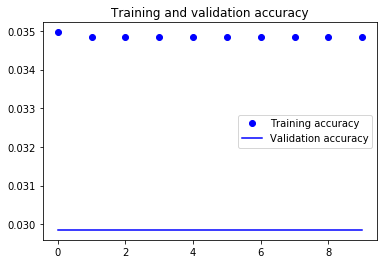

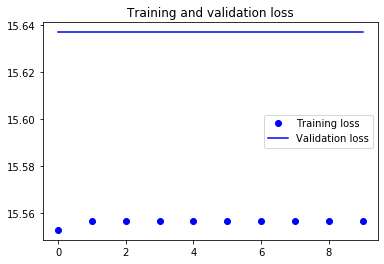

In [54]:
# Plot results
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [55]:
# Now with 3 convolutional layers
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2,2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation="relu"))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(24, activation="softmax"))

cnn3.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [56]:
cnn3.fit(trainX, trainY, validation_data=(testX, testY),
         batch_size=256,
         verbose=1,
         epochs=10)

Train on 7636 samples, validate on 2546 samples
Epoch 1/10
7636/7636 [==============================] - ETA: 2:18 - loss: 15.2930 - acc: 0.04 - ETA: 1:50 - loss: 14.8997 - acc: 0.07 - ETA: 1:38 - loss: 14.8861 - acc: 0.07 - ETA: 1:31 - loss: 14.9265 - acc: 0.07 - ETA: 1:25 - loss: 15.0263 - acc: 0.06 - ETA: 1:20 - loss: 15.0194 - acc: 0.06 - ETA: 1:16 - loss: 15.0324 - acc: 0.06 - ETA: 1:12 - loss: 15.0265 - acc: 0.06 - ETA: 1:08 - loss: 14.9939 - acc: 0.06 - ETA: 1:04 - loss: 15.0055 - acc: 0.06 - ETA: 1:01 - loss: 15.0037 - acc: 0.06 - ETA: 57s - loss: 15.0073 - acc: 0.0680 - ETA: 54s - loss: 14.9862 - acc: 0.069 - ETA: 51s - loss: 15.0086 - acc: 0.068 - ETA: 47s - loss: 15.0280 - acc: 0.066 - ETA: 44s - loss: 14.9938 - acc: 0.069 - ETA: 41s - loss: 15.0007 - acc: 0.068 - ETA: 37s - loss: 14.9893 - acc: 0.069 - ETA: 34s - loss: 14.9891 - acc: 0.069 - ETA: 31s - loss: 14.9920 - acc: 0.069 - ETA: 28s - loss: 15.0097 - acc: 0.068 - ETA: 24s - loss: 15.0085 - acc: 0.068 - ETA: 21s - loss

7636/7636 [==============================] - ETA: 1:29 - loss: 15.4885 - acc: 0.03 - ETA: 1:26 - loss: 15.3311 - acc: 0.04 - ETA: 1:22 - loss: 15.2576 - acc: 0.05 - ETA: 1:19 - loss: 15.0635 - acc: 0.06 - ETA: 1:16 - loss: 15.0226 - acc: 0.06 - ETA: 1:13 - loss: 15.0583 - acc: 0.06 - ETA: 1:10 - loss: 15.0747 - acc: 0.06 - ETA: 1:07 - loss: 15.0871 - acc: 0.06 - ETA: 1:04 - loss: 15.1107 - acc: 0.06 - ETA: 1:00 - loss: 15.0792 - acc: 0.06 - ETA: 57s - loss: 15.0478 - acc: 0.0664 - ETA: 54s - loss: 15.0320 - acc: 0.067 - ETA: 51s - loss: 15.0429 - acc: 0.066 - ETA: 48s - loss: 15.0523 - acc: 0.066 - ETA: 45s - loss: 15.0478 - acc: 0.066 - ETA: 42s - loss: 15.0163 - acc: 0.068 - ETA: 39s - loss: 14.9959 - acc: 0.069 - ETA: 36s - loss: 15.0023 - acc: 0.069 - ETA: 33s - loss: 14.9914 - acc: 0.069 - ETA: 30s - loss: 14.9942 - acc: 0.069 - ETA: 27s - loss: 15.0028 - acc: 0.069 - ETA: 24s - loss: 15.0220 - acc: 0.068 - ETA: 20s - loss: 15.0286 - acc: 0.067 - ETA: 17s - loss: 15.0346 - acc: 0.

In [57]:
# Now with data augmentation
# from keras.preprocessing.image import ImageDataGenerator

In [58]:
# gen = ImageDataGenerator(rotation_range=8, width_shift_range= 0.08,
#                         shear_range=0.3,
#                         height_shift_range=0.08, zoom_range=0.08)
# batches = gen.flow(trainX, trainY, batch_size=256)
# val_batches = gen.flow(testX, testY, batch_size=256)

In [59]:
# history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256,
#                             epochs=50,
#                             validation_data=val_batches, 
#                              validation_steps = 12000//256,
#                             use_multiprocessing = True)

In [60]:
print("hello")

hello
